# Laboratorio \#3: Modelos de Regresión en R

## Ejercicio 1

Utilizando R realice una función que dado un dataframe cualquiera de dos columnas, donde la primera (índice 1) sea el valor de la variable independiente (X) y la segunda sea  valor de una variable dependiente (Y), devuelva una lista con los siguientes elementos:

1. Un arreglo con los valores de los estimadores para 𝛽! y 𝛽".
2. El valor del coeficiente de determinación 𝑟# del modelo.
3. El coeficiente de correlación 𝑟 (raíz cuadrada de 𝑟#).
4. Un arreglo con los valores de los residuos.
5. Una gráfica con la nube de puntos y la recta de regresión del modelo.


In [36]:
get_beta_1 <- function(X, Y, n) {
  
  sum_x = sum(X)
  sum_y = sum(Y)
  sum_xx = sum(X*X) 
  sum_xy = sum(X*Y)
 
  beta = ((sum_x * sum_y) - n * sum_xy) / (sum_x*sum_x - n * sum_xx)

  return <- beta
}

In [37]:
get_beta_0 <- function(X, Y, beta_1, n) {
  sum_x = sum(X)
  sum_y = sum(Y)

  beta = (sum_y - beta_1 * sum_x) / (n)
  return <- beta
}

In [38]:
get_chi_squared <- function(Y, y_hat, n) {

  y_mean = sum(Y)/n
  
  sum_y_hat_y_mean <-  y_hat - y_mean
  sum_y_hat_y_mean <- sum(sum_y_hat_y_mean * sum_y_hat_y_mean)

  sum_y_y_mean <- Y - y_mean
  sum_y_y_mean <- sum(sum_y_y_mean * sum_y_y_mean)
  return <- (sum_y_hat_y_mean)/(sum_y_y_mean)

}

In [40]:
linear_regression_estimators <- function(dataset, X_index, Y_index) {
  n <- nrow(dataset)
  beta_1 <- get_beta_1(dataset[X_index], dataset[Y_index], n)

  beta_0 <- get_beta_0(dataset[X_index], dataset[Y_index], beta_1, n)

  y_hat <- beta_1 *  dataset[X_index] + beta_0

  r_2 <- get_chi_squared(dataset[Y_index], y_hat, n)
  r <- sqrt(r_2)

  estimators<-list(beta_1, beta_0, r_2, r)
  names(estimators)<-c("coefficient","intercept","r2","r")

  return <- estimators

}

In [2]:
dataset = read.csv("Admisions.csv")
dataset <- as.data.frame(sapply(dataset, as.numeric))

In [43]:
result <- linear_regression_estimators(dataset, 2, 9)
result

$coefficient
[1] 0.01012587

$intercept
[1] -2.482815

$r2
[1] 0.6566682

$r
[1] 0.8103506

## Ejercicio 2

Para este ejercicio se le solicita que desarrolle las siguientes actividades utilizando RStudio Con el dataset Admissions adjunto a este laboratorio realice lo siguiente:

1. Realice un análisis estadístico sobre todas las variables del dataset, recuerde que pude usar la función summary().
2. Realice una gráfica de densidad para cada una de las variables numéricas en el dataset: GRE.Score, TOEFEL.Score, CGPA y Chance of Admit.
3. Realice una gráfica de correlación entre las variables del inciso anterior.
4. Realice comentarios sobre el análisis estadístico de las variables numéricas y la gráfica de correlación.
5. Realice un scatter plot (nube de puntos) de todas las variables numéricas contra la variable Chance of Admit.
6. Utilizando la función train y trainControl para crear un cross- validation y le permita evaluar los siguientes modelos:
• Chance of Admit ~ TOEFEL.Score.
• Chance of Admit ~ CGPA.
• Chance of Admit ~ GRE.Score.
• Chance of Admit ~ TOEFEL.Score + CGPA.
• Chance of Admit ~ TOEFEL.Score + GRE.Score.
• Chance of Admit ~ GRE.Score + CGPA.
• Chance of Admit ~ TOEFEL.Score + CGPA + GRE.Score.

Posteriormente cree una lista ordenando de mejor a peor cual es el mejor modelo en predicción, recuerde que es necesario caclular el RMSE para poder armar correctamente la lista.

1. Realice un análisis estadístico sobre todas las variables del dataset, recuerde que pude usar la función summary().

In [181]:
summary(dataset)

   Serial.No.      GRE.Score      TOEFL.Score    University.Rating
 Min.   :  1.0   Min.   :290.0   Min.   : 92.0   Min.   :1.000    
 1st Qu.:125.8   1st Qu.:308.0   1st Qu.:103.0   1st Qu.:2.000    
 Median :250.5   Median :317.0   Median :107.0   Median :3.000    
 Mean   :250.5   Mean   :316.5   Mean   :107.2   Mean   :3.114    
 3rd Qu.:375.2   3rd Qu.:325.0   3rd Qu.:112.0   3rd Qu.:4.000    
 Max.   :500.0   Max.   :340.0   Max.   :120.0   Max.   :5.000    
      SOP             LOR             CGPA          Research   
 Min.   :1.000   Min.   :1.000   Min.   :6.800   Min.   :0.00  
 1st Qu.:2.500   1st Qu.:3.000   1st Qu.:8.127   1st Qu.:0.00  
 Median :3.500   Median :3.500   Median :8.560   Median :1.00  
 Mean   :3.374   Mean   :3.484   Mean   :8.576   Mean   :0.56  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:9.040   3rd Qu.:1.00  
 Max.   :5.000   Max.   :5.000   Max.   :9.920   Max.   :1.00  
 Chance.of.Admit 
 Min.   :0.3400  
 1st Qu.:0.6300  
 Median :0.7200  
 Mean   :0.

2. Realice una gráfica de densidad para cada una de las variables numéricas en el dataset: GRE.Score, TOEFEL.Score, CGPA y Chance of Admit.

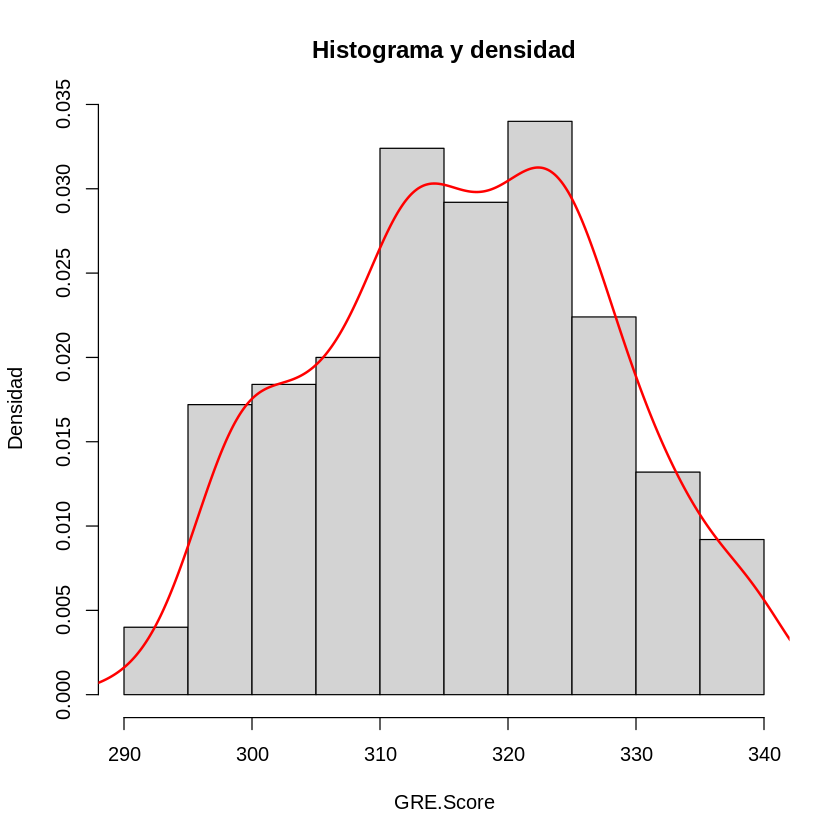

In [189]:
hist(dataset$GRE.Score, freq = FALSE, main = "Histograma y densidad",
     ylab = "Densidad", xlab="GRE.Score")
dGRE.Score <- density(dataset$GRE.Score)
lines(dGRE.Score, lwd = 2, col = "red")

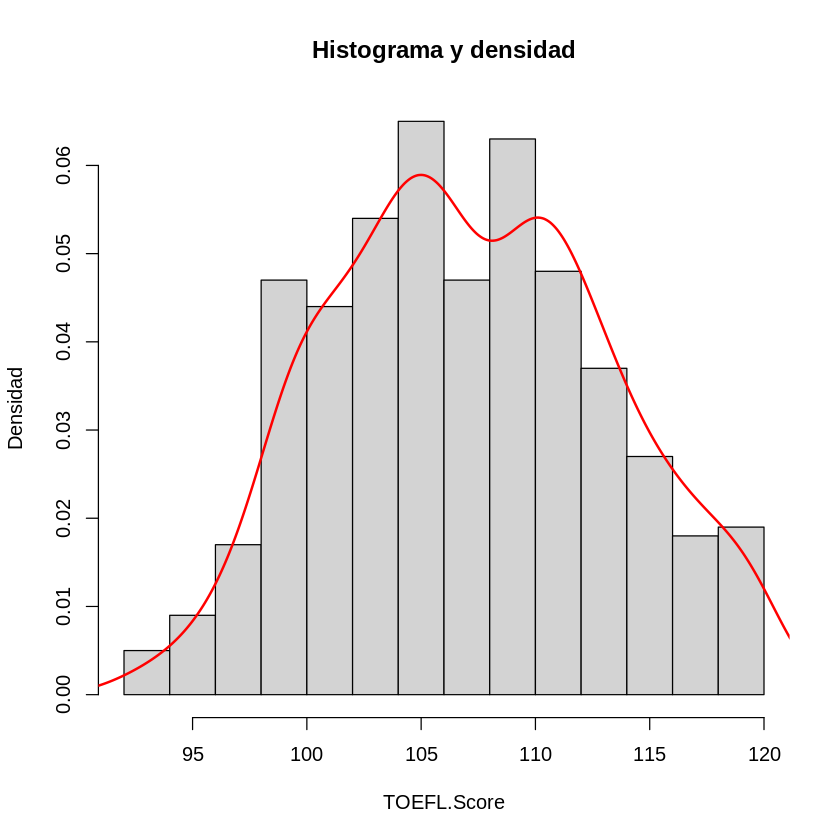

In [193]:
hist(dataset$TOEFL.Score, freq = FALSE, main = "Histograma y densidad",
     ylab = "Densidad", xlab="TOEFL.Score")
dTOEFL.Score <- density(dataset$TOEFL.Score)
lines(dTOEFL.Score, lwd = 2, col = "red")

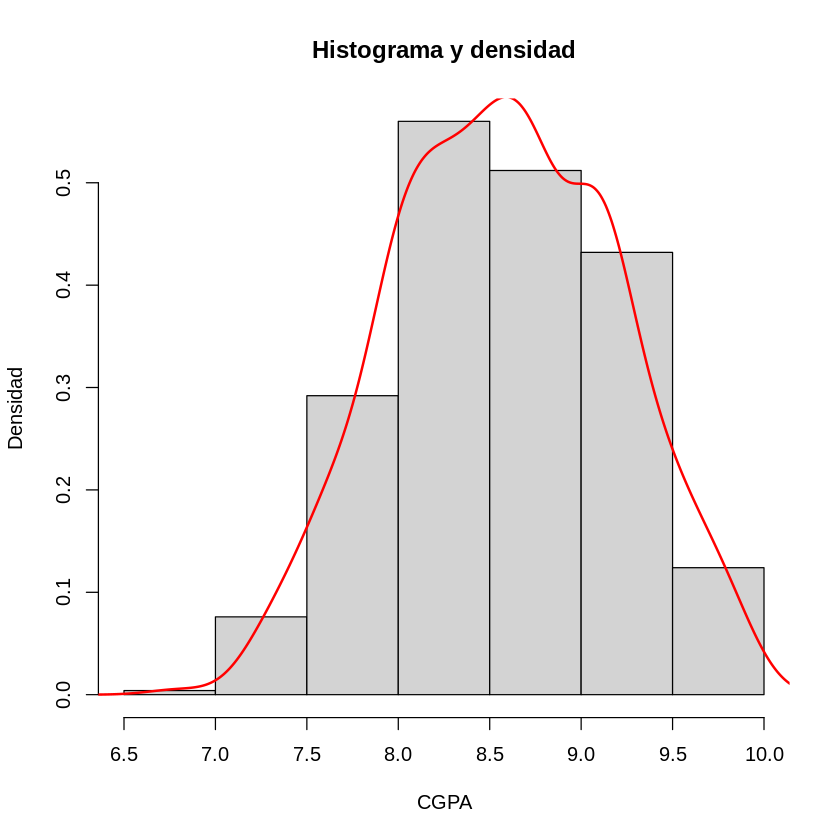

In [194]:
hist(dataset$CGPA, freq = FALSE, main = "Histograma y densidad",
     ylab = "Densidad", xlab="CGPA")
dCGPA <- density(dataset$CGPA)
lines(dCGPA, lwd = 2, col = "red")

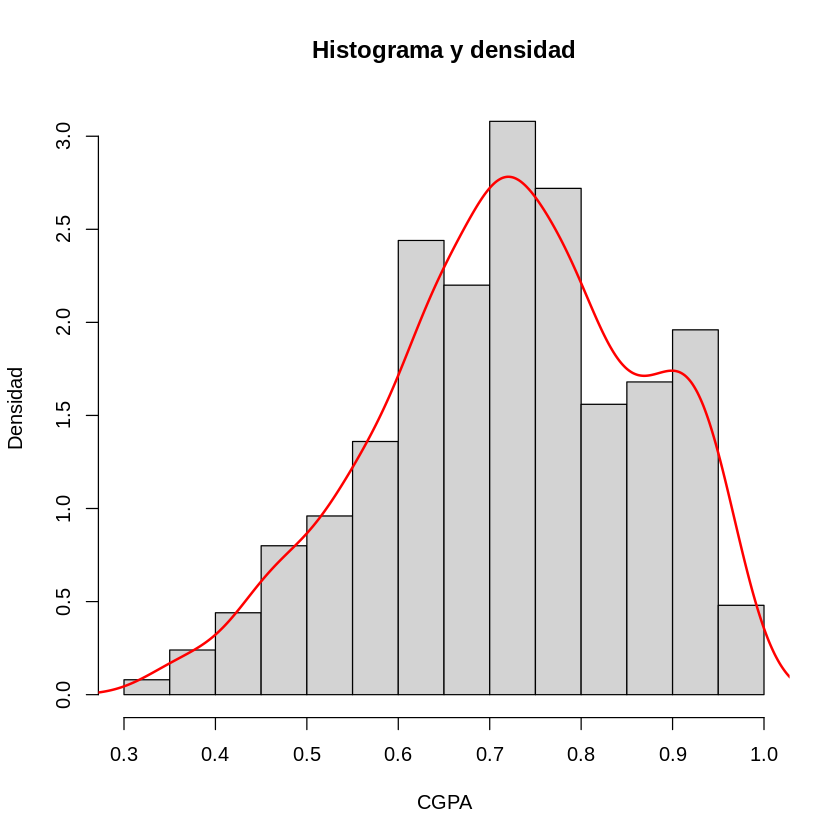

In [195]:
hist(dataset$Chance.of.Admit , freq = FALSE, main = "Histograma y densidad",
     ylab = "Densidad", xlab="CGPA")
dChance.of.Admit  <- density(dataset$Chance.of.Admit )
lines(dChance.of.Admit , lwd = 2, col = "red")

3. Realice una gráfica de correlación entre las variables del inciso anterior.

In [ ]:
install.packages("GGally")
library(GGally)

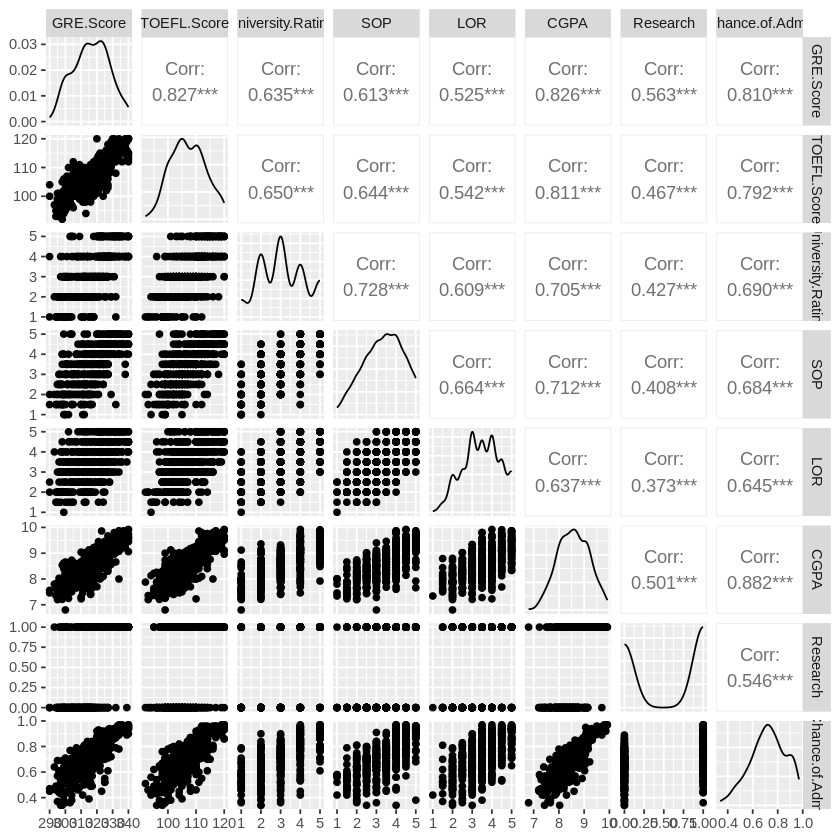

In [34]:
df_cont<-dataset[,c("GRE.Score", "TOEFL.Score", "University.Rating", "SOP", "LOR", "CGPA", "Research", "Chance.of.Admit")]
ggpairs(df_cont,)

4. Realice comentarios sobre el análisis estadístico de las variables numéricas y la gráfica de correlación.

Existe una correlacion entre las variables independietes en relacion con la variable dependiente Chance.of.Admit. 

5.  Realice un scatter plot (nube de puntos) de todas las variables numéricas contra la variable Chance of Admit.

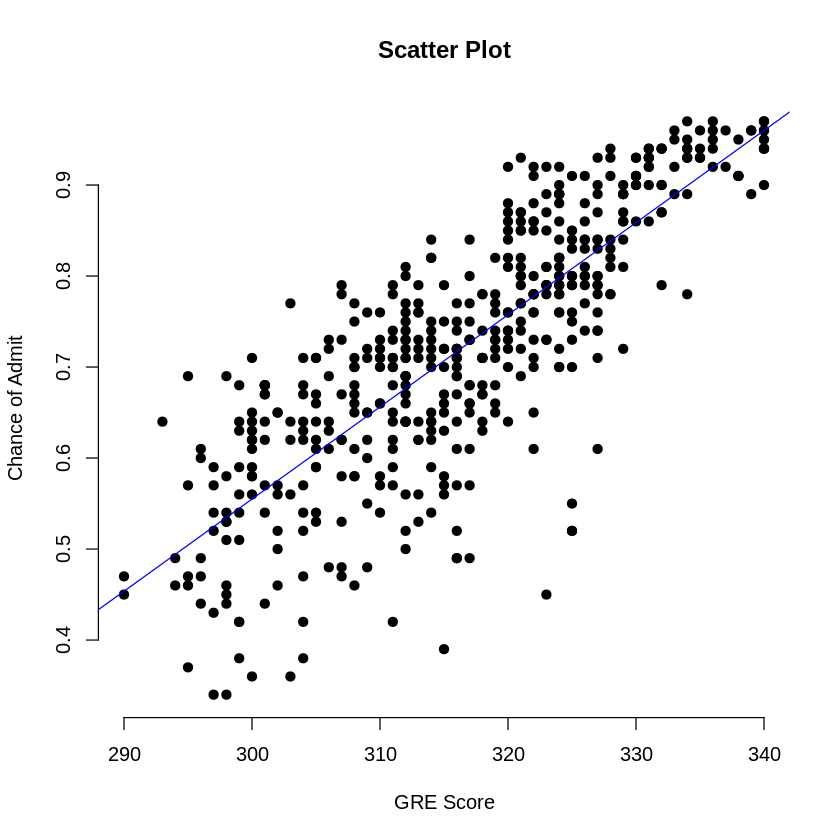

In [207]:
plot(dataset$GRE.Score, dataset$Chance.of.Admit, main = "Scatter Plot",
     xlab = "GRE Score", ylab = "Chance of Admit",
     pch = 19, frame = FALSE)
abline(lm(dataset$Chance.of.Admit ~ dataset$GRE.Score, data = mtcars), col = "blue")

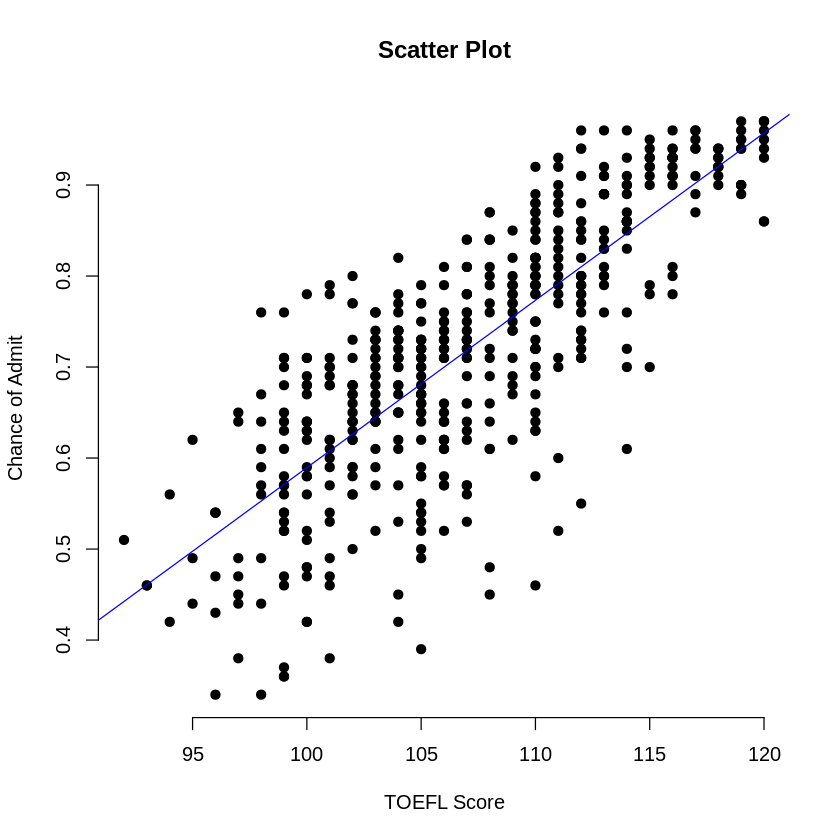

In [210]:
plot(dataset$TOEFL.Score, dataset$Chance.of.Admit, main = "Scatter Plot",
     xlab = "TOEFL Score", ylab = "Chance of Admit",
     pch = 19, frame = FALSE)
abline(lm(dataset$Chance.of.Admit ~ dataset$TOEFL.Score, data = mtcars), col = "blue")

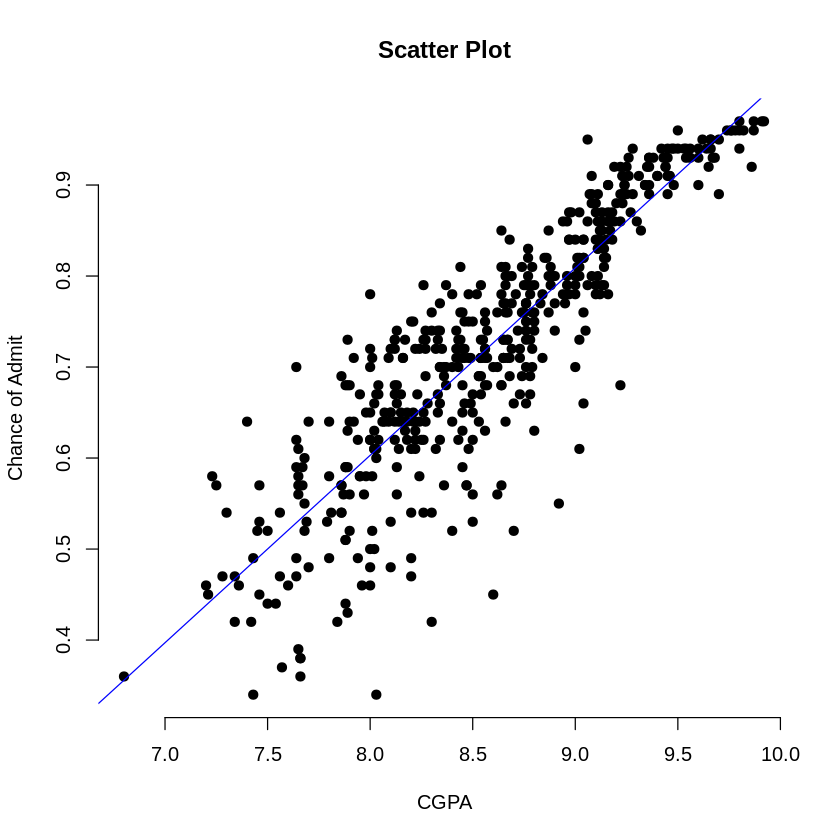

In [211]:
plot(dataset$CGPA, dataset$Chance.of.Admit, main = "Scatter Plot",
     xlab = "CGPA", ylab = "Chance of Admit",
     pch = 19, frame = FALSE)
abline(lm(dataset$Chance.of.Admit ~ dataset$CGPA, data = mtcars), col = "blue")

6. Utilizando la función train y trainControl para crear un cross- validation y le permita evaluar los siguientes modelos:

In [1]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [8]:
library(caret)

Loading required package: lattice



- Chance of Admit ~ TOEFEL.Score.

In [15]:
ctrl_toefel <- trainControl(method = "repeatedcv",
                     repeats = 5)
model_Toefel <- train(Chance.of.Admit ~  TOEFL.Score,, data = dataset,
             method = "lm",
             trControl = ctrl_toefel)
model_Toefel$results

,intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,0.08585608,0.6328169,0.06673315,0.008391182,0.06304419,0.006560482


- Chance of Admit ~ CGPA.

In [16]:
ctrl_cgpa <- trainControl(method = "repeatedcv",
                     repeats = 5)
model_cgpa <- train(Chance.of.Admit ~  CGPA, data = dataset,
             method = "lm",
             trControl = ctrl_cgpa)
model_cgpa$results

,intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,0.06598881,0.7828928,0.04846233,0.008395798,0.04936312,0.006032453


- Chance of Admit ~ GRE.Score.

In [20]:
ctrl_gre <- trainControl(method = "repeatedcv",
                     repeats = 5)
model_gre <- train(Chance.of.Admit ~  GRE.Score, data = dataset,
             method = "lm",
             trControl = ctrl_gre)
model_gre$results

,intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,0.08238292,0.6618443,0.06279546,0.008328571,0.06318167,0.006362386


- Chance of Admit ~ TOEFEL.Score + CGPA.

In [21]:
ctrl_toefel_cgpa <- trainControl(method = "repeatedcv",
                     repeats = 5)
toefel_cgpa <- train(Chance.of.Admit ~ TOEFL.Score + CGPA, data = dataset,
             method = "lm",
             trControl = ctrl_toefel_cgpa)
toefel_cgpa$results

,intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,0.06332834,0.8022725,0.04658103,0.009769906,0.05450624,0.006427512


- Chance of Admit ~ TOEFEL.Score + GRE.Score.

In [27]:
ctrl_toefel_gre <- trainControl(method = "repeatedcv",
                     repeats = 5)
toefel_toefel_gre <- train(Chance.of.Admit ~ TOEFL.Score + GRE.Score, data = dataset,
             method = "lm",
             trControl = ctrl_toefel_gre)
toefel_toefel_gre$results

,intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,0.07635393,0.7088009,0.05836741,0.01033271,0.07381656,0.007256479


- Chance of Admit ~ GRE.Score + CGPA.

In [28]:
ctrl_gre_cgpa <- trainControl(method = "repeatedcv",
                     repeats = 5)
model_gre_cgpa <- train(Chance.of.Admit ~ GRE.Score + CGPA, data = dataset,
             method = "lm",
             trControl = ctrl_gre_cgpa)
model_gre_cgpa$results

,intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,0.06294884,0.8037519,0.04560016,0.008165904,0.04619252,0.005315919


- Chance of Admit ~ TOEFEL.Score + CGPA + GRE.Score.

In [29]:
ctrl_toefel_gre_cgpa <- trainControl(method = "repeatedcv",
                     repeats = 5)
model_toefel_gre_cgpa <- train(Chance.of.Admit ~ TOEFL.Score + GRE.Score + CGPA, data = dataset,
             method = "lm",
             trControl = ctrl_toefel_gre_cgpa)
model_toefel_gre_cgpa$results

,intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,0.06233626,0.8071039,0.04504111,0.007642472,0.04912147,0.00467457


Con los resultados podemos ordernarlos de la siguiente manera. 

1.   `TOEFL.Score+CGPA+GRE.Score`
2.   `GRE.SCore+CGPA`
3.   `TOEFL.Score+CGPA`
4.   `CGPA`
5.   `TOEFL.Score+GRE.Score`
6.   `GRE.Score`
7.   `TOEFL.Score`

## Ejercicio 3

A continuación se le muestran tres imágenes que muestran los resultados obtenidos de correr la función summary() a dos modelos de regresión lineal, para este ejercicio se le solicita que realice la interpretación de las tablas resultantes. Recuerde tomar en cuenta la signficancia de los parámetros (signfícancia local), la signficancia del modelo (signficancia global), el valor del 𝑟!: y cualquier observación que considere relevante para determinar si el modelo estructuralmente es adecuado o no.


# Modelo \#1

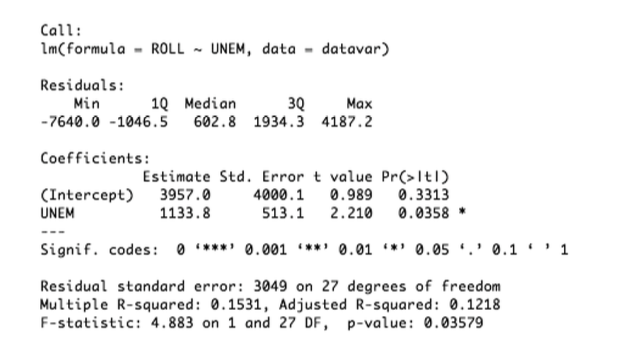

# Modelo \#2

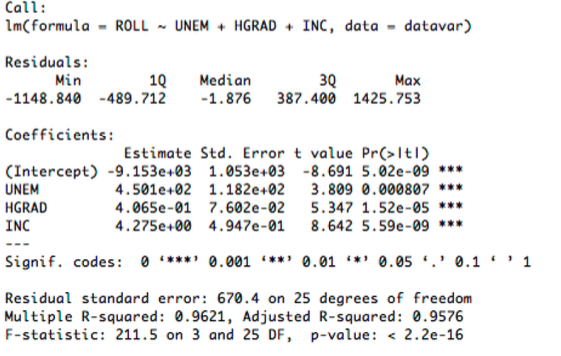

# Modelo \#3


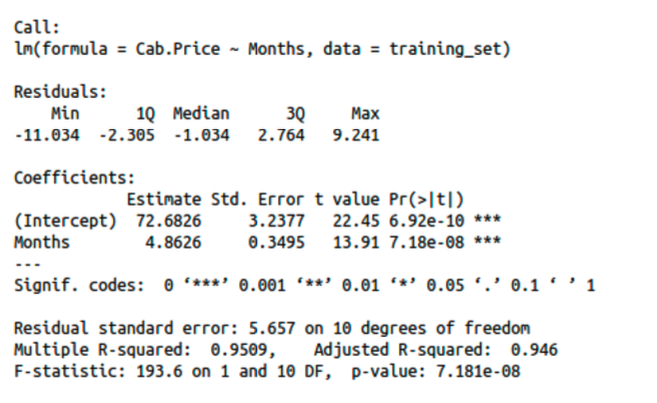



Las variables del modelo 3 no son las mismas del modelo 2 y 1 
La accurancy del modelo 2 es mucho mayor que el modelo 1, el error dal modelo 1 es mayor al del modelo 2 y se tiene un p-value menor en el modelo 2 
por lo que podemos concluir que el modelo 2 es el mejor 